# Análise Exploratória – Palmer Penguins Dataset 🐧

Este notebook realiza uma análise exploratória da base de dados *Penguins*, considerada o "novo Iris" para estudos de estatística e aprendizado de máquina.  
O objetivo é aplicar **estatística descritiva** e gerar **visualizações** para responder perguntas sobre o comportamento das variáveis.


In [ ]:
# Bibliotecas principais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Carregar dataset (do seaborn)
df = sns.load_dataset("penguins")

# Se você quiser usar o CSV do Kaggle, troque por:
# df = pd.read_csv("/content/penguins.csv")


## Parte 1 – Exploração Inicial dos Dados

- O dataset possui 4 variáveis numéricas principais: **bill_length_mm**, **bill_depth_mm**, **flipper_length_mm**, **body_mass_g**.  
- Observa-se que há alguns valores ausentes (`NaN`) nas variáveis categóricas e também em algumas numéricas.  
- A maior variação está em `body_mass_g` e `flipper_length_mm`, o que pode indicar maior diversidade física entre espécies.  
- Em algumas variáveis, a média e a mediana não coincidem, sugerindo **assimetria** nas distribuições.


In [ ]:
# Ver primeiras linhas
df.head()

# Descrição estatística
df.describe()

# Verificar informações gerais
df.info()

# Verificar valores ausentes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


## Parte 2 – Histogramas com KDE

- O comprimento da nadadeira apresenta valores mais comuns entre **190 mm e 210 mm**.  
- A massa corporal se concentra entre **3500 g e 4500 g**.  
- A distribuição da nadadeira parece mais **simétrica**, enquanto a de massa corporal é levemente **assimétrica à direita** (cauda longa).


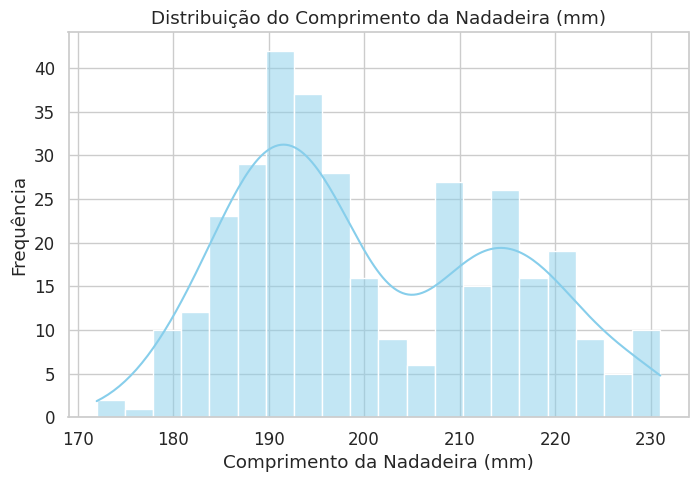

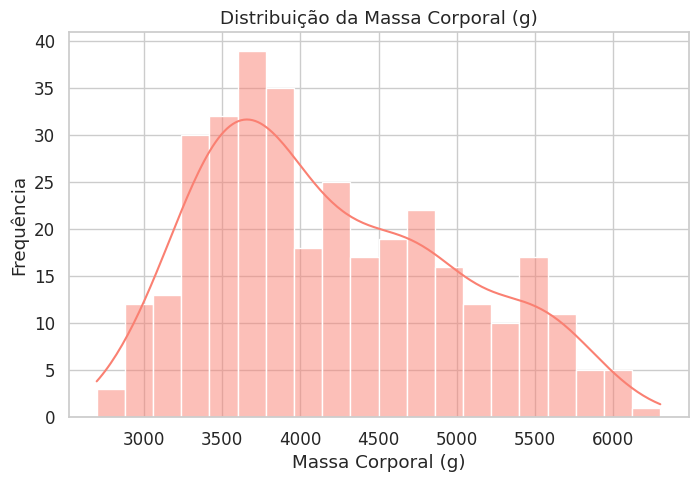

In [ ]:
# Distribuição flipper_length_mm
plt.figure(figsize=(8,5))
sns.histplot(df["flipper_length_mm"], kde=True, bins=20, color="skyblue")
plt.title("Distribuição do Comprimento da Nadadeira (mm)")
plt.xlabel("Comprimento da Nadadeira (mm)")
plt.ylabel("Frequência")
plt.show()

# Distribuição body_mass_g
plt.figure(figsize=(8,5))
sns.histplot(df["body_mass_g"], kde=True, bins=20, color="salmon")
plt.title("Distribuição da Massa Corporal (g)")
plt.xlabel("Massa Corporal (g)")
plt.ylabel("Frequência")
plt.show()


## Parte 3 – Boxplot do Peso por Espécie

- A espécie **Gentoo** possui maior massa corporal média.  
- A espécie **Adelie** mostra menor variabilidade, enquanto **Chinstrap** apresenta mais dispersão.  
- Foram observados alguns outliers, que podem representar tanto erros de medição quanto indivíduos atípicos (mas ainda válidos).


/tmp/ipython-input-448528034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="body_mass_g", data=df, palette="Set2")


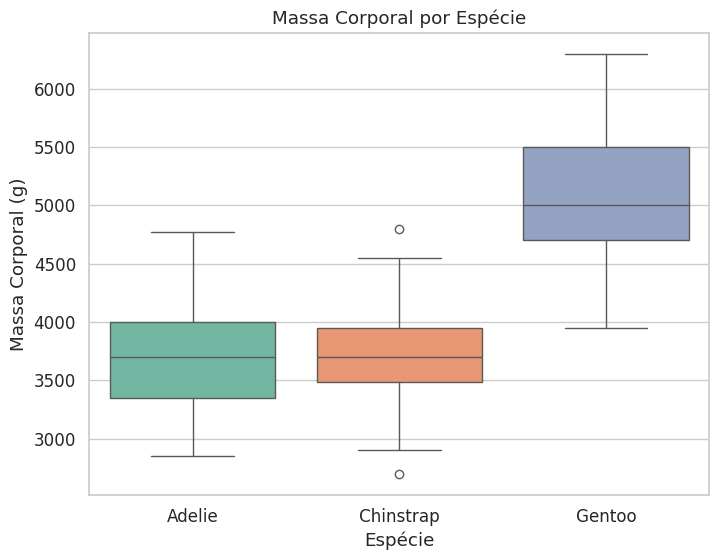

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="species", y="body_mass_g", data=df, palette="Set2")
plt.title("Massa Corporal por Espécie")
plt.xlabel("Espécie")
plt.ylabel("Massa Corporal (g)")
plt.show()


## Parte 4 – Scatter Plot por Espécie e Sexo

- As espécies ocupam regiões relativamente distintas no gráfico:  
  - Adelie → bicos curtos e profundos.  
  - Gentoo → bicos longos e rasos.  
  - Chinstrap → intermediário.  
- Existe relação inversa entre comprimento e profundidade do bico.  
- O sexo não altera significativamente o padrão, apenas ligeira diferença de tamanho entre machos e fêmeas.


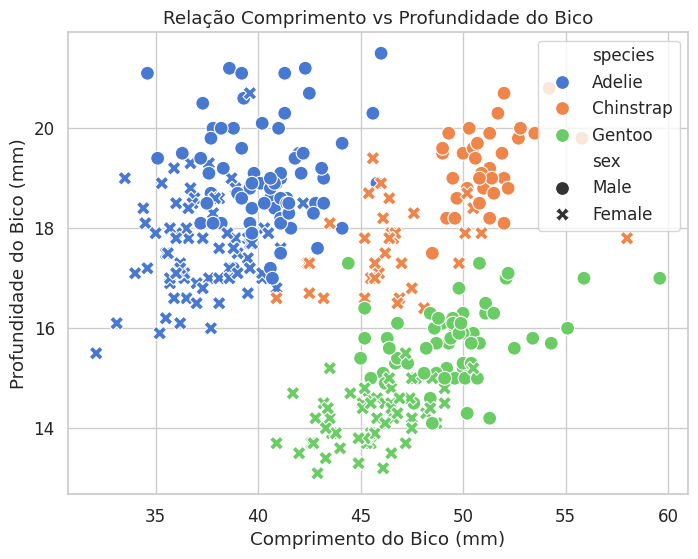

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="sex",
    data=df,
    s=100
)
plt.title("Relação Comprimento vs Profundidade do Bico")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Profundidade do Bico (mm)")
plt.legend()
plt.show()


## Parte 5 – Heatmap de Correlação

- Há forte correlação positiva entre **flipper_length_mm** e **body_mass_g** (pinguins maiores pesam mais).  
- `bill_length_mm` apresenta correlação moderada com massa e nadadeira.  
- `bill_depth_mm` é quase independente das demais.  
- Para modelos preditivos, variáveis fortemente correlacionadas podem ser redundantes, exigindo seleção de features.


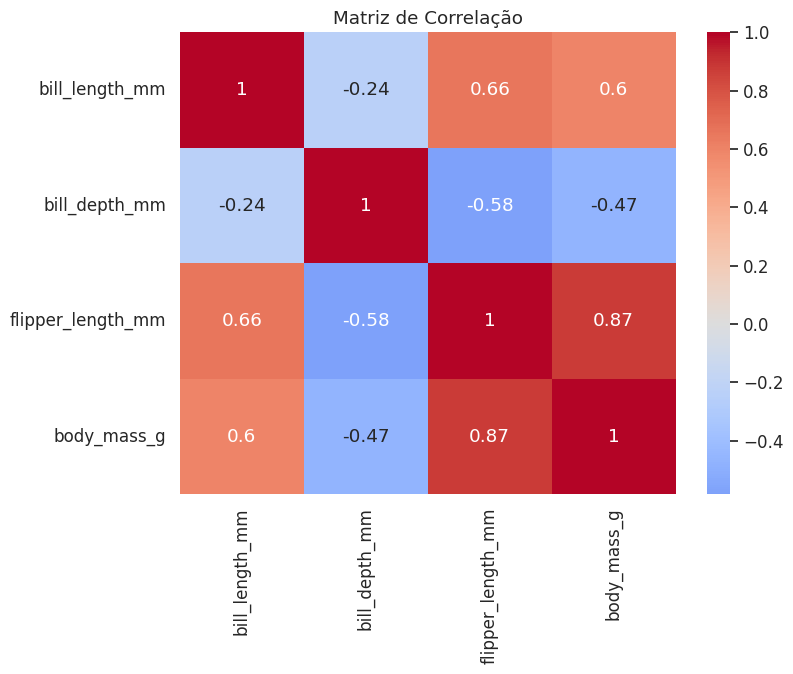

In [ ]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.show()


# Conclusão

A análise exploratória permitiu:
- Entender a variação física entre espécies.  
- Identificar padrões de distribuição e possíveis outliers.  
- Observar correlações importantes para futuros modelos preditivos.  

O dataset dos pinguins é uma ótima alternativa ao clássico Iris, pois traz variáveis
numéricas e categóricas com maior diversidade de padrões.


/tmp/ipython-input-3930570019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="viridis")


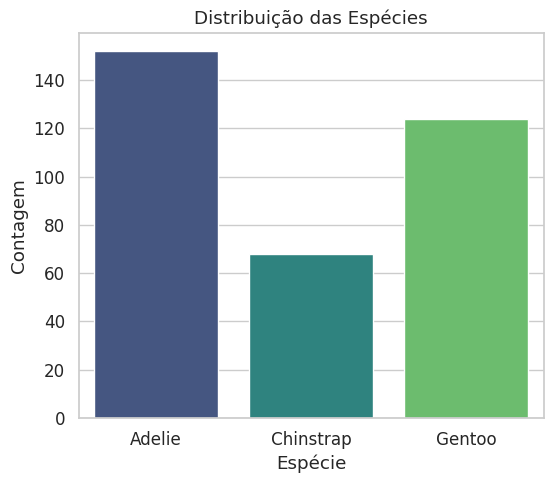

/tmp/ipython-input-3930570019.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="pastel")


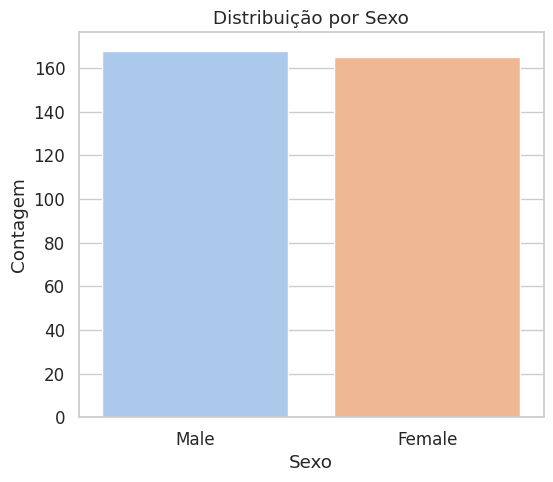

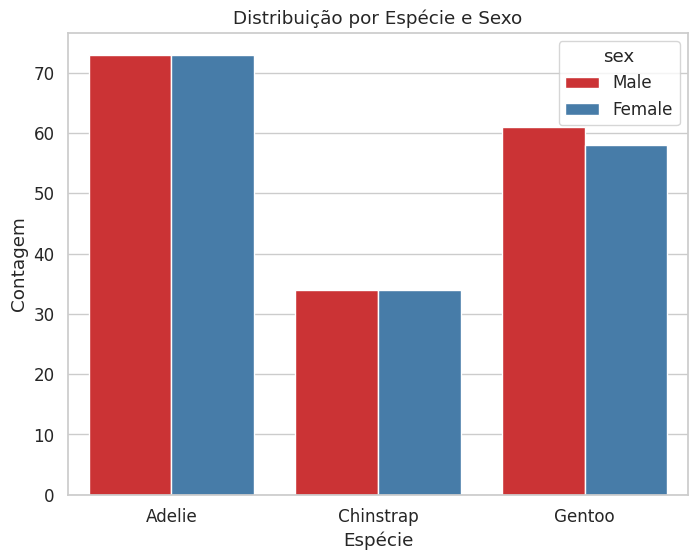

In [ ]:
# Contagem de espécies
plt.figure(figsize=(6,5))
sns.countplot(x="species", data=df, palette="viridis")
plt.title("Distribuição das Espécies")
plt.xlabel("Espécie")
plt.ylabel("Contagem")
plt.show()

# Contagem de sexos
plt.figure(figsize=(6,5))
sns.countplot(x="sex", data=df, palette="pastel")
plt.title("Distribuição por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.show()

# Contagem por espécie e sexo
plt.figure(figsize=(8,6))
sns.countplot(x="species", hue="sex", data=df, palette="Set1")
plt.title("Distribuição por Espécie e Sexo")
plt.xlabel("Espécie")
plt.ylabel("Contagem")
plt.show()
